# Reddit Data Influencer Score Fitting 
- fit fake sentiment 
- cluster senitment 
- fit influencer score

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling 

# Fitting Fake Sentiment 

In [3]:
# Reddit Script 
#### imports ####

import praw
import pandas as pd
from datetime import datetime
from praw.models import MoreComments
import preprocessor as pre
import regex as re


reddit = praw.Reddit(
    client_id="auD_kIwyQ1r3hfxTQEYuGw",
    client_secret="XyLGeMB1mJqoaB0lCXrk4Jtmy515AA",
    password="wisdmai1234",
    user_agent="wisdm",
    username="Dramatic-Ad-9651",
    check_for_async=False
)

# make sure we're connected to the api
print(reddit.user.me())


#### Data Extraction #### 

posts = pd.DataFrame()
comments = pd.DataFrame()

tickers = tickers = list(set(['SPY','TSLA','PYPL', 'GME', 'VIX', 'AMD', 'F',
                              'BBBY', 'NFLX', 'NVDA', 'AAPL', 'INTC', 'FSR', 
                              'QQQ', 'TLRY', 'MSFT', 'TWTR', 'SNAP', 'HOOD', 
                              'WMT', 'PTON', 'WISH', 'CPRX', 'AMC', 'SNDL', 
                              'AMZN', 'DIS', 'NIO', 'FB', 'NFLX', 'LCID', 'NVDA']))


subreddits = ['wallstreetbets', 'stocks',  'investing', 'finance']


for ticker in tickers: 
    for sub in subreddits: 
        subreddit = reddit.subreddit(sub)
        print(subreddit, ' - ', ticker)
        for post in subreddit.search(ticker.lower(), sort = 'new', time_filter = 'day', limit = None):
            #check if title has stock ticker 
            if ticker.lower() not in post.title.lower(): 
                #print(post.title)
                continue 
            #check if author is not banned 
            if hasattr(post.author, 'is_suspended'):
                #print(post.author.is_suspended)
                continue
            try: 
                #collect desired values 
                title_instance = {
                    'ticker': ticker, 
                    'subreddit': str(post.subreddit),
                    'content': post.title, 
                    'upvotes': post.score, 
                    'upvote_ratio': post.upvote_ratio,
                    'num_comments': post.num_comments, 
                    #might break in author deletes their post 
                    'author_comment_karma': post.author.comment_karma, 
                    'author_verified': post.author.has_verified_email, 
                    'time': datetime.fromtimestamp(post.created_utc).strftime('%Y-%m-%d'),
                }
            
            except: 
                continue 

            #create row and concat it to the df
            row = pd.DataFrame([title_instance])
            posts = pd.concat([posts, row], axis = 0, ignore_index = True)

            #checking comments
            for comment in post.comments:
                #do not want sub comments of comments 
                if isinstance(comment, MoreComments):
                    continue
                #remove user reports
                if 'user report' in comment.body.lower(): 
                    continue
                
                try: 
                    comment_instance = {
                        'ticker': ticker, 
                        'subreddit': str(post.subreddit), 
                        # optional can remove if no grouping by title is needed 
                        'post_title': post.title,
                        'content': comment.body, 
                        'upvotes': comment.score, 
                        'replies': comment.replies.__len__(), 
                        'sticked': comment.stickied,
                        #might break deleted comments
                        'author_comment_karma': comment.author.comment_karma, 
                        'author_verified': comment.author.has_verified_email, 
                        'time': datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d'),
                    }
                except:
                    continue

                row = pd.DataFrame([comment_instance])
                comments = pd.concat([comments, row], axis = 0, ignore_index = True)


#### Data Export #### 


comments_df = comments.copy()
posts_df = posts.copy()




#comments_export_path = r"C:\Users\Dennis\Desktop\comments.csv"
#comments_df.to_csv(comments_export_path)

#posts_export_path = r"C:\Users\Dennis\Desktop\posts.csv"
#posts_df.to_csv(posts_export_path)

print('Data Exported')
print("Posts", len(posts_df))
print("Comments:", len(comments_df))

Version 7.6.0 of praw is outdated. Version 7.6.1 was released Friday November 11, 2022.


Dramatic-Ad-9651
wallstreetbets  -  F
stocks  -  F
investing  -  F
finance  -  F
wallstreetbets  -  FSR
stocks  -  FSR
investing  -  FSR
finance  -  FSR
wallstreetbets  -  LCID
stocks  -  LCID
investing  -  LCID
finance  -  LCID
wallstreetbets  -  NFLX
stocks  -  NFLX
investing  -  NFLX
finance  -  NFLX
wallstreetbets  -  PTON
stocks  -  PTON
investing  -  PTON
finance  -  PTON
wallstreetbets  -  AMZN
stocks  -  AMZN
investing  -  AMZN
finance  -  AMZN
wallstreetbets  -  AMC
stocks  -  AMC
investing  -  AMC
finance  -  AMC
wallstreetbets  -  GME
stocks  -  GME
investing  -  GME
finance  -  GME
wallstreetbets  -  SNDL
stocks  -  SNDL
investing  -  SNDL
finance  -  SNDL
wallstreetbets  -  DIS
stocks  -  DIS
investing  -  DIS
finance  -  DIS
wallstreetbets  -  HOOD
stocks  -  HOOD
investing  -  HOOD
finance  -  HOOD
wallstreetbets  -  NIO
stocks  -  NIO
investing  -  NIO
finance  -  NIO
wallstreetbets  -  BBBY
stocks  -  BBBY
investing  -  BBBY
finance  -  BBBY
wallstreetbets  -  SNAP
sto

In [4]:
comments_df.shape

(661, 10)

In [5]:
comments.head()

,ticker,subreddit,post_title,content,upvotes,replies,sticked,author_comment_karma,author_verified,time
0,F,wallstreetbets,FED- Household savings are elevated! Household...,"""Of course everyone has savongs! How much coul...",23,2,False,2617,True,2022-11-22
1,F,wallstreetbets,FED- Household savings are elevated! Household...,Why does everyone always post the savings rate...,28,3,False,112549,True,2022-11-22
2,F,wallstreetbets,FED- Household savings are elevated! Household...,Im sure everyone was fiscally responsible with...,14,3,False,45867,True,2022-11-22
3,F,wallstreetbets,FED- Household savings are elevated! Household...,"Omg inflation is so low, only 9 dollars…..",3,0,False,173,True,2022-11-22
4,F,wallstreetbets,FED- Household savings are elevated! Household...,“I think debt is a good thing!”\n\n\-![img](em...,12,0,False,19903,True,2022-11-22


In [6]:
sentiments = ['neutral', 'negative', 'positive']


In [7]:
a

In [8]:
text = comments['content'].values[0]
text

'"Of course everyone has savongs! How much could a banana cost? 5 Dollars?'

In [9]:
type(text)

str

In [10]:
results = analyser.polarity_scores(text)
results

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [11]:
del results['compound'] 
results

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [12]:
max(results, key = results.get)

'neu'

In [13]:
results[max(results, key = results.get)]

1.0

In [14]:
def add_sentiment(df): 
    content = df['content'].copy().values 
    sentiments, scores = [], []
    for text in content:
        results = analyser.polarity_scores(text)
        del results['compound'] 

        sentiment = max(results, key = results.get) 
        score = results[sentiment]  

        sentiments = np.append(sentiments, sentiment) 
        scores = np.append(scores, score)

    new_df = df.copy() 
    new_df['sentiment'] = sentiments 
    new_df['sentiment_pscore'] = scores 

    return new_df

In [15]:
sentiment_df = add_sentiment(comments_df)

In [16]:
sentiment_df.head()

,ticker,subreddit,post_title,content,upvotes,replies,sticked,author_comment_karma,author_verified,time,sentiment,sentiment_pscore
0,F,wallstreetbets,FED- Household savings are elevated! Household...,"""Of course everyone has savongs! How much coul...",23,2,False,2617,True,2022-11-22,neu,1.000
1,F,wallstreetbets,FED- Household savings are elevated! Household...,Why does everyone always post the savings rate...,28,3,False,112549,True,2022-11-22,neu,0.909
2,F,wallstreetbets,FED- Household savings are elevated! Household...,Im sure everyone was fiscally responsible with...,14,3,False,45867,True,2022-11-22,neu,0.645
3,F,wallstreetbets,FED- Household savings are elevated! Household...,"Omg inflation is so low, only 9 dollars…..",3,0,False,173,True,2022-11-22,neu,0.719
4,F,wallstreetbets,FED- Household savings are elevated! Household...,“I think debt is a good thing!”\n\n\-![img](em...,12,0,False,19903,True,2022-11-22,neu,0.501


# Feature Engineering

In [17]:
# to do


# Simple Clustering

In [119]:
cluster_df = sentiment_df[['sentiment_pscore', 'upvotes', 'replies', 'upvotes', 'author_comment_karma']].copy()
cluster_df.head()

,sentiment_pscore,upvotes,replies,upvotes,author_comment_karma
0,1.000,23,2,23,2617
1,0.909,28,3,28,112549
2,0.645,14,3,14,45867
3,0.719,3,0,3,173
4,0.501,12,0,12,19903


In [120]:
kmeans = KMeans(n_clusters= 5, random_state = 11) 
kmeans.fit(cluster_df)
labels = kmeans.labels_
cluster_df['cluster'] = labels
cluster_df

,sentiment_pscore,upvotes,replies,upvotes,author_comment_karma,cluster
0,1.000,23,2,23,2617,0
1,0.909,28,3,28,112549,4
2,0.645,14,3,14,45867,2
3,0.719,3,0,3,173,0
4,0.501,12,0,12,19903,2
...,...,...,...,...,...,...
656,1.000,1,0,1,6441,0
657,0.714,1,1,1,1183,0
658,1.000,1,0,1,11,0
659,0.811,1,1,1,2782,0


In [126]:
#reduce the dimension 5 to 2 dimensions to vizualise the dataset 
data_embed = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(cluster_df.to_numpy())

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 661 samples in 0.001s...
[t-SNE] Computed neighbors for 661 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 661 / 661
[t-SNE] Mean sigma: 17.974192
[t-SNE] Computed conditional probabilities in 0.076s
[t-SNE] Iteration 50: error = 47.9793739, gradient norm = 0.4105248 (50 iterations in 0.195s)
[t-SNE] Iteration 100: error = 45.6578941, gradient norm = 0.3689424 (50 iterations in 0.173s)
[t-SNE] Iteration 150: error = 45.0199776, gradient norm = 0.3772635 (50 iterations in 0.165s)
[t-SNE] Iteration 200: error = 44.7520332, gradient norm = 0.3710487 (50 iterations in 0.155s)
[t-SNE] Iteration 250: error = 45.0344505, gradient norm = 0.3691308 (50 iterations in 0.153s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.034451
[t-SNE] Iteration 300: error = 0.1555347, gradient norm = 0.0015426 (50 iterations in 0.147s)
[t-SNE] Iteration 350: error = 0.1338973, gradient norm = 0.0002972

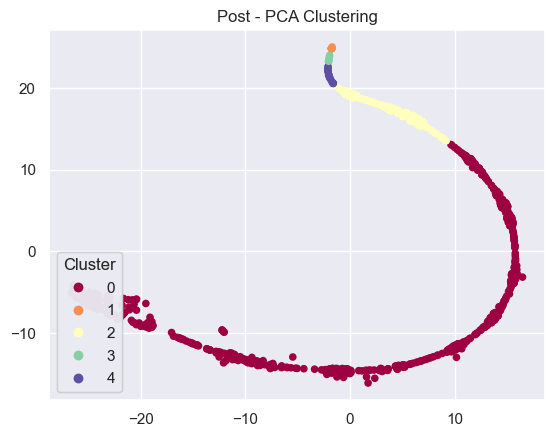

In [127]:
#clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
x, y = data_embed[:, 0], data_embed[:, 1]


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=labels, s=20 ,cmap="Spectral")

legend = ax.legend(*scatter.legend_elements(num=4),
                    loc="lower left", title="Cluster")

ax.add_artist(legend)
plt.title("Post - PCA Clustering");


# Clustering w/ Additional Features 

In [128]:
dummies = pd.get_dummies(data = sentiment_df, columns = ['ticker', 'subreddit', 'sticked', 'author_verified', 'sentiment'])
dummies.columns

Index(['post_title', 'content', 'upvotes', 'replies', 'author_comment_karma',
       'time', 'sentiment_pscore', 'ticker_DIS', 'ticker_F', 'ticker_GME',
       'ticker_MSFT', 'ticker_PYPL', 'ticker_SPY', 'ticker_TSLA', 'ticker_VIX',
       'ticker_WISH', 'subreddit_stocks', 'subreddit_wallstreetbets',
       'sticked_False', 'sticked_True', 'author_verified_False',
       'author_verified_True', 'sentiment_neg', 'sentiment_neu',
       'sentiment_pos'],
      dtype='object')

In [129]:
cluster_df = dummies.drop(['post_title', 'content', 'time', 'sticked_False', 'author_verified_False'], axis = 1)
cluster_df.head()

,upvotes,replies,author_comment_karma,sentiment_pscore,ticker_DIS,ticker_F,ticker_GME,ticker_MSFT,ticker_PYPL,ticker_SPY,ticker_TSLA,ticker_VIX,ticker_WISH,subreddit_stocks,subreddit_wallstreetbets,sticked_True,author_verified_True,sentiment_neg,sentiment_neu,sentiment_pos
0,23,2,2617,1.000,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,28,3,112549,0.909,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,14,3,45867,0.645,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,3,0,173,0.719,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
4,12,0,19903,0.501,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [130]:
kmeans = KMeans(n_clusters= 5, random_state = 11) 
kmeans.fit(cluster_df)
labels = kmeans.labels_
cluster_df['cluster'] = labels
cluster_df

,upvotes,replies,author_comment_karma,sentiment_pscore,ticker_DIS,ticker_F,ticker_GME,ticker_MSFT,ticker_PYPL,ticker_SPY,...,ticker_VIX,ticker_WISH,subreddit_stocks,subreddit_wallstreetbets,sticked_True,author_verified_True,sentiment_neg,sentiment_neu,sentiment_pos,cluster
0,23,2,2617,1.000,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,28,3,112549,0.909,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,4
2,14,3,45867,0.645,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,2
3,3,0,173,0.719,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,12,0,19903,0.501,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,1,0,6441,1.000,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
657,1,1,1183,0.714,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
658,1,0,11,1.000,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
659,1,1,2782,0.811,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0


In [131]:
data_embed = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(cluster_df.to_numpy())

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 661 samples in 0.000s...
[t-SNE] Computed neighbors for 661 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 661 / 661
[t-SNE] Mean sigma: 16.884933
[t-SNE] Computed conditional probabilities in 0.122s
[t-SNE] Iteration 50: error = 47.7973175, gradient norm = 0.3984585 (50 iterations in 0.196s)
[t-SNE] Iteration 100: error = 45.4492340, gradient norm = 0.3819202 (50 iterations in 0.166s)
[t-SNE] Iteration 150: error = 45.3176193, gradient norm = 0.3640417 (50 iterations in 0.175s)
[t-SNE] Iteration 200: error = 44.9459343, gradient norm = 0.3723973 (50 iterations in 0.177s)
[t-SNE] Iteration 250: error = 44.6694260, gradient norm = 0.3654828 (50 iterations in 0.173s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.669426
[t-SNE] Iteration 300: error = 0.1462196, gradient norm = 0.0005021 (50 iterations in 0.144s)
[t-SNE] Iteration 350: error = 0.1286044, gradient norm = 0.0002326

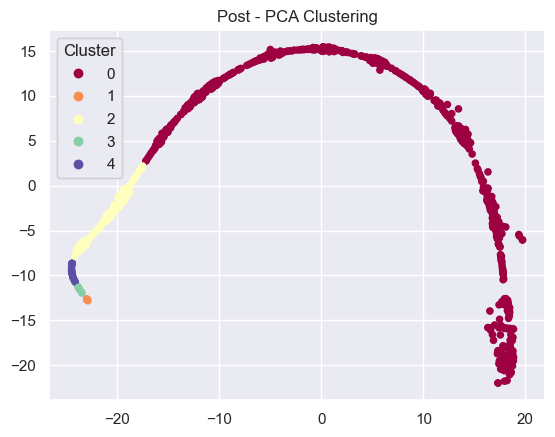

In [132]:
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
x, y = data_embed[:, 0], data_embed[:, 1]


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=labels, s=20 ,cmap="Spectral")

legend = ax.legend(*scatter.legend_elements(num=4),
                    loc="upper left", title="Cluster")

ax.add_artist(legend)
plt.title("Post - PCA Clustering");


# Clustering w/ Normalization

In [133]:
norm_cluster_df = pd.DataFrame(normalize(cluster_df))
norm_cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.008788,0.000764,0.999961,0.000382,0.0,0.000382,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000382,0.0,0.000382,0.0,0.000382,0.0,0.000000
1,0.000249,0.000027,1.000000,0.000008,0.0,0.000009,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000009,0.0,0.000009,0.0,0.000009,0.0,0.000036
2,0.000305,0.000065,1.000000,0.000014,0.0,0.000022,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000022,0.0,0.000022,0.0,0.000022,0.0,0.000044
3,0.017337,0.000000,0.999774,0.004155,0.0,0.005779,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.005779,0.0,0.005779,0.0,0.005779,0.0,0.000000
4,0.000603,0.000000,1.000000,0.000025,0.0,0.000050,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000050,0.0,0.000050,0.0,0.000050,0.0,0.000100


In [134]:
kmeans = KMeans(n_clusters= 5, random_state = 11) 
kmeans.fit(norm_cluster_df)
labels =  kmeans.labels_
norm_cluster_df['cluster'] = labels

In [135]:
norm_cluster_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,cluster
0,0.008788,0.000764,0.999961,0.000382,0.0,0.000382,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000382,0.0,0.000382,0.0,0.000382,0.0,0.000000,4
1,0.000249,0.000027,1.000000,0.000008,0.0,0.000009,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000009,0.0,0.000009,0.0,0.000009,0.0,0.000036,4
2,0.000305,0.000065,1.000000,0.000014,0.0,0.000022,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000022,0.0,0.000022,0.0,0.000022,0.0,0.000044,4
3,0.017337,0.000000,0.999774,0.004155,0.0,0.005779,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.005779,0.0,0.005779,0.0,0.005779,0.0,0.000000,4
4,0.000603,0.000000,1.000000,0.000025,0.0,0.000050,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000050,0.0,0.000050,0.0,0.000050,0.0,0.000100,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,0.000155,0.000000,1.000000,0.000155,0.0,0.000000,0.0,0.0,0.0,0.000155,...,0.0,0.0,0.000155,0.0,0.000000,0.0,0.000155,0.0,0.000000,4
657,0.000845,0.000845,0.999998,0.000604,0.0,0.000000,0.0,0.0,0.0,0.000845,...,0.0,0.0,0.000845,0.0,0.000845,0.0,0.000845,0.0,0.000000,4
658,0.088736,0.000000,0.976092,0.088736,0.0,0.000000,0.0,0.0,0.0,0.088736,...,0.0,0.0,0.088736,0.0,0.088736,0.0,0.088736,0.0,0.000000,0
659,0.000359,0.000359,1.000000,0.000292,0.0,0.000000,0.0,0.0,0.0,0.000359,...,0.0,0.0,0.000359,0.0,0.000359,0.0,0.000359,0.0,0.000000,4


In [136]:
norm_data_embed = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(norm_cluster_df.to_numpy())

c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Dennis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 661 samples in 0.000s...
[t-SNE] Computed neighbors for 661 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 661 / 661
[t-SNE] Mean sigma: 0.000140
[t-SNE] Computed conditional probabilities in 0.070s
[t-SNE] Iteration 50: error = 52.4312401, gradient norm = 0.4023127 (50 iterations in 0.209s)
[t-SNE] Iteration 100: error = 50.6113167, gradient norm = 0.4008793 (50 iterations in 0.177s)
[t-SNE] Iteration 150: error = 50.2812500, gradient norm = 0.3975933 (50 iterations in 0.181s)
[t-SNE] Iteration 200: error = 50.9001884, gradient norm = 0.3901297 (50 iterations in 0.187s)
[t-SNE] Iteration 250: error = 50.9582253, gradient norm = 0.3938403 (50 iterations in 0.185s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.958225
[t-SNE] Iteration 300: error = 0.2960703, gradient norm = 0.0008197 (50 iterations in 0.169s)
[t-SNE] Iteration 350: error = 0.2575286, gradient norm = 0.0002305 

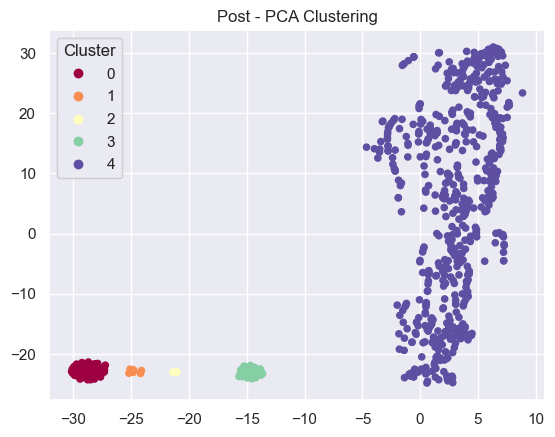

In [139]:
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
x, y = norm_data_embed[:, 0], norm_data_embed[:, 1]


fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=labels, s=20 ,cmap="Spectral")

legend = ax.legend(*scatter.legend_elements(num=4),
                    loc="upper left", title="Cluster")

ax.add_artist(legend)
plt.title("Post - PCA Clustering");


In [141]:
#posts_df.to_csv("posts-11-22-22")

In [142]:
#comments.to_csv("comments-11-22-22")